In [1]:
import tensorflow as tf
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import os

# Create Training Dataset

In [2]:
train_dir=r"C:\Users\speed\Documents\English Alphabets Using TensorFlow CNN\data\train"
labels=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
train=[]
assert len(labels)==26

In [15]:
tsb=tf.keras.callbacks.TensorBoard(log_dir="logs")

In [16]:
for i in labels:
    for j in os.listdir(os.path.join(train_dir,i)):
        class_num=labels.index(i)
        img=cv2.imread(os.path.join(train_dir,i,j),cv2.IMREAD_GRAYSCALE)
        train.append([img,class_num])

In [17]:
random.shuffle(train)
x=[]
y=[]
for i,j in train:
    x.append(i)
    y.append(j)
x=np.array(x)
y=np.array(y)
X=x/255

# Create Model (128x3)

In [21]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128,(3,3),input_shape=(34,34,1),activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128,(3,3),activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128,(3,3),activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation=tf.nn.relu),
    tf.keras.layers.Dense(26,activation=tf.nn.softmax)
])

# Compile The Model

In [22]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# Train The Model

In [23]:
history=model.fit(X,y,epochs=10,validation_split=0.3,callbacks=[tsb])

Epoch 1/10
299/299 [==============================] - 51s 168ms/step - loss: 0.9444 - accuracy: 0.7198 - val_loss: 0.3843 - val_accuracy: 0.8802
Epoch 2/10
299/299 [==============================] - 60s 201ms/step - loss: 0.3679 - accuracy: 0.8865 - val_loss: 0.2608 - val_accuracy: 0.9151
Epoch 3/10
299/299 [==============================] - 57s 191ms/step - loss: 0.2507 - accuracy: 0.9175 - val_loss: 0.1723 - val_accuracy: 0.9456
Epoch 4/10
299/299 [==============================] - 100s 334ms/step - loss: 0.1813 - accuracy: 0.9412 - val_loss: 0.1355 - val_accuracy: 0.9610
Epoch 5/10
299/299 [==============================] - 134s 450ms/step - loss: 0.1494 - accuracy: 0.9498 - val_loss: 0.1310 - val_accuracy: 0.9571
Epoch 6/10
299/299 [==============================] - 134s 448ms/step - loss: 0.1214 - accuracy: 0.9586 - val_loss: 0.1005 - val_accuracy: 0.9676
Epoch 7/10
299/299 [==============================] - 130s 436ms/step - loss: 0.0951 - accuracy: 0.9680 - val_loss: 0.1153 - va

# Get Summary Of Model

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       1280      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 128)         147584    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

# Accuracy Graph

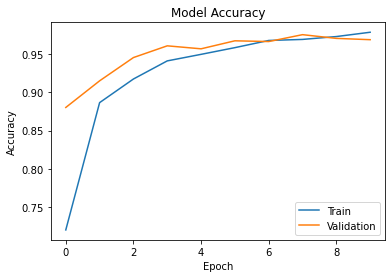

In [25]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Loss Graph

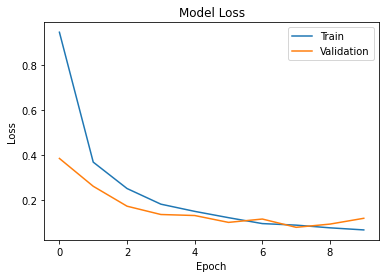

In [26]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Create Test Dataset

In [42]:
test_dir=r"C:\Users\speed\Documents\English Alphabets Using TensorFlow CNN\data\test"
test=[]

In [43]:
for i in labels:
    for j in os.listdir(os.path.join(test_dir,i)):
        class_num=labels.index(i)
        img=cv2.imread(os.path.join(test_dir,i,j),cv2.IMREAD_GRAYSCALE)
        test.append([img,class_num])

In [44]:
random.shuffle(test)
_x=[]
_y=[]
for i,j in test:
    _x.append(i)
    _y.append(j)
_x=np.array(x)
_y=np.array(y)
_X=_x/255

# Predictions

### By Model

In [45]:
print(labels[np.argmax(model.predict(_X)[12])])

K


### Real One

K


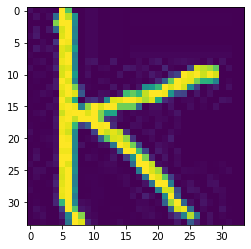

In [46]:
plt.imshow(_X[12])
print(labels[_y[12]])

# Save

In [47]:
model.save("128x3-CNN.h5")

# Convert To TFLite Model For Edge Devices

In [48]:
tf_lite_converter=tf.lite.TFLiteConverter.from_keras_model(model)
with open("128x3-CNN.tflite","wb") as f:
    f.write(tf_lite_converter.convert())

INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmpgrdo_ai7\assets


INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmpgrdo_ai7\assets
